In [1]:
# training the model -- FULL CODE --
from fastai.vision.all import *


In [2]:

path = Path('data')


In [3]:

lbl_names = get_image_files('./data/GT_png')
fnames = get_image_files('./data/images')



In [4]:
img_fn = fnames[2]


In [5]:

im = PILImage.create(str(fnames[0]))
msk = PILMask.create(str(lbl_names[0]))



In [6]:

def get_msk(fn, p2c):
    "Grab a mask from a `filename` and adjust the pixels based on `pix2class`"
    fn = path/''/f'GT_png'/f'{fn.stem}_mask{fn.suffix}'
    msk = np.array(PILMask.create(fn))
    mx = np.max(msk)
    for i, val in enumerate(p2c):
        msk[msk == p2c[i]] = val
    return PILMask.create(msk)


def n_codes(fnames, is_partial=True):
    "Gather the codes from a list of `fnames`"
    vals = set()
    if is_partial:
        random.shuffle(fnames)
        fnames = fnames[:len(fnames)]
    for fname in fnames:
        msk = np.array(PILMask.create(fname))
        for val in np.unique(msk):
            if val not in vals:
                vals.add(val)
    vals = list(vals)
    p2c = dict()
    for i, val in enumerate(vals):
        p2c[i] = vals[i]
    return p2c



In [7]:

p2c = n_codes(lbl_names)

codes = ['Background', 'Wheel']


def get_y(o): return get_msk(o, p2c)



In [8]:

binary = DataBlock(blocks=(ImageBlock, MaskBlock(codes)),
                   get_items=get_image_files,
                   splitter=RandomSplitter(),
                   get_y=get_y,
                   item_tfms=Resize(224),
                   batch_tfms=[Normalize.from_stats(*imagenet_stats)])



In [9]:
dls = binary.dataloaders('data/images', bs=2)

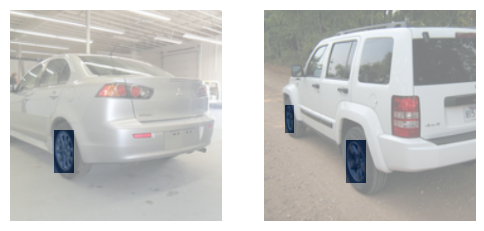

In [10]:
dls.show_batch(cmap='Blues', vmin=0, vmax=1)

In [11]:
learn = unet_learner(dls, resnet34)

/home/ciprian/.cache/pypoetry/virtualenvs/binary-segmentation-h2q2oFom-py3.10/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/ciprian/.cache/pypoetry/virtualenvs/binary-segmentation-h2q2oFom-py3.10/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [12]:
learn.fit(80)

epoch,train_loss,valid_loss,time


../aten/src/ATen/native/cuda/Loss.cu:240: nll_loss_forward_reduce_cuda_kernel_2d: block: [0,0,0], thread: [0,0,0] Assertion `t >= 0 && t < n_classes` failed.
../aten/src/ATen/native/cuda/Loss.cu:240: nll_loss_forward_reduce_cuda_kernel_2d: block: [0,0,0], thread: [1,0,0] Assertion `t >= 0 && t < n_classes` failed.
../aten/src/ATen/native/cuda/Loss.cu:240: nll_loss_forward_reduce_cuda_kernel_2d: block: [0,0,0], thread: [2,0,0] Assertion `t >= 0 && t < n_classes` failed.
../aten/src/ATen/native/cuda/Loss.cu:240: nll_loss_forward_reduce_cuda_kernel_2d: block: [0,0,0], thread: [3,0,0] Assertion `t >= 0 && t < n_classes` failed.
../aten/src/ATen/native/cuda/Loss.cu:240: nll_loss_forward_reduce_cuda_kernel_2d: block: [0,0,0], thread: [4,0,0] Assertion `t >= 0 && t < n_classes` failed.
../aten/src/ATen/native/cuda/Loss.cu:240: nll_loss_forward_reduce_cuda_kernel_2d: block: [0,0,0], thread: [5,0,0] Assertion `t >= 0 && t < n_classes` failed.
../aten/src/ATen/native/cuda/Loss.cu:240: nll_loss_f

RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [ ]:
preds = learn.get_preds()

In [ ]:
p = preds[0][0]

In [ ]:
learn.save('trained_car_Wheels')

In [ ]:
learn.predict()